In [1]:
%load_ext autoreload
%autoreload 2

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Sparse-V Attention on LAMBADA

## Fixed k

Experiments on LAMBADA task using the sparse attention that selects a fixed number of tokens (k).

In [75]:
df = pd.read_json("../out/sparse_softmax_fixed_k.jsonl", lines=True)
df = df.replace(256, "full")

In [76]:
# Save baseline for later
baseline = df[df["k"] == "full"]

In [77]:
baseline

,model,k,ppl,ppl_stderr,acc,acc_stderr,_duration
4,pythia-70m,full,130.960831,5.519582,0.227246,0.005838,264.562947
9,pythia-160m,full,37.254809,1.403613,0.353775,0.006661,388.686477
14,pythia-410m,full,10.780272,0.321680,0.516398,0.006962,802.826834
19,pythia-1b,full,7.916268,0.211687,0.562585,0.006911,1671.914691
24,pythia-2.8b,full,5.033951,0.119235,0.646614,0.006660,2633.251917


In [78]:
df

,model,k,ppl,ppl_stderr,acc,acc_stderr,_duration
0,pythia-70m,4,182.445192,9.023394,0.250340,0.006035,203.431082
1,pythia-70m,8,127.016869,5.943049,0.258684,0.006101,205.566944
2,pythia-70m,16,114.931491,5.128662,0.252668,0.006054,203.417745
3,pythia-70m,32,118.823934,5.123899,0.241219,0.005960,207.054966
4,pythia-70m,full,130.960831,5.519582,0.227246,0.005838,264.562947
5,pythia-160m,4,54.024282,2.216121,0.330681,0.006554,343.666891
6,pythia-160m,8,38.491834,1.516312,0.363866,0.006703,342.302177
7,pythia-160m,16,35.329056,1.355597,0.364448,0.006705,353.478017
8,pythia-160m,32,35.762670,1.354998,0.362895,0.006699,325.505290
9,pythia-160m,full,37.254809,1.403613,0.353775,0.006661,388.686477


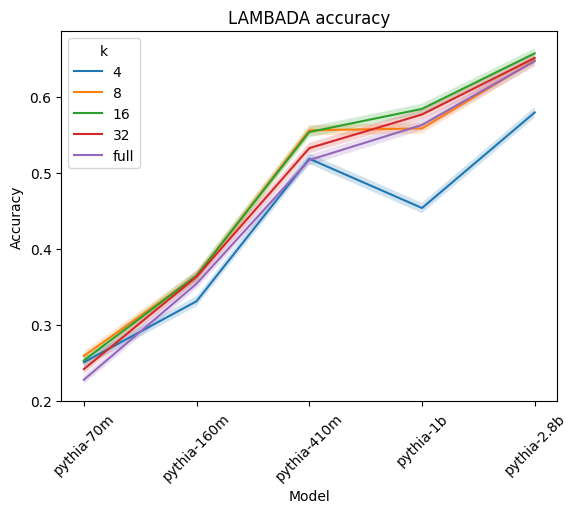

In [79]:
grouped = df.groupby('k')

fig, ax = plt.subplots()

alpha = 0.2
for proportion, group in grouped:
    ax.plot(group['model'], group['acc'], label=proportion)
    ax.fill_between(group['model'], group['acc'] - group['acc_stderr'], group['acc'] + group['acc_stderr'], alpha=alpha)



ax.tick_params(axis="x", labelrotation=45)
ax.set_xlabel('Model')
ax.set_ylabel('Accuracy')
ax.set_title("LAMBADA accuracy")
ax.legend(title="k")
plt.show()

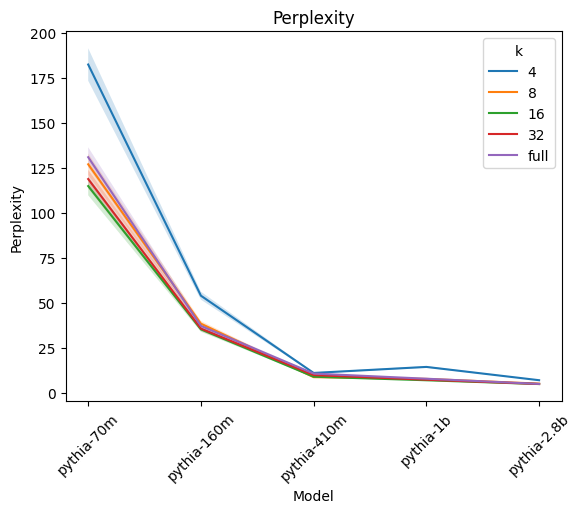

In [81]:
fig, ax = plt.subplots()

alpha = 0.2
for proportion, group in grouped:
    ax.plot(group['model'], group['ppl'], label=proportion)
    ax.fill_between(group['model'], group['ppl'] - group['ppl_stderr'], group['ppl'] + group['ppl_stderr'], alpha=alpha)

ax.tick_params(axis="x", labelrotation=45)
ax.set_xlabel('Model')
ax.set_ylabel('Perplexity')
ax.set_title("Perplexity")
ax.legend(title="k")
plt.show()

## Fixed percentage

Experiments on LAMBADA task using a fixed percentage of the context length instead of the fixed number of elements. This differs from the initial experiments as percentage is based on the *context length*, not the maximum sequence length within the batch, so expecting some performance decrease compared to initial experiments. However, we introduce an additional $k_{min}$ parameter that determines the minimum number of tokens to attend to.

In [42]:
b = baseline.drop("k", axis=1, inplace=False)
b["p"] = 1.0
b["k_min"] = 1

In [83]:
b

,model,ppl,ppl_stderr,acc,acc_stderr,_duration,p,k_min
4,pythia-70m,130.960831,5.519582,0.227246,0.005838,264.562947,1.0,1
9,pythia-160m,37.254809,1.403613,0.353775,0.006661,388.686477,1.0,1
14,pythia-410m,10.780272,0.321680,0.516398,0.006962,802.826834,1.0,1
19,pythia-1b,7.916268,0.211687,0.562585,0.006911,1671.914691,1.0,1
24,pythia-2.8b,5.033951,0.119235,0.646614,0.006660,2633.251917,1.0,1


In [84]:
df = pd.read_json("../out/sparse_softmax_fixed_p.jsonl", lines=True)

In [85]:
df

,model,p,k_min,ppl,ppl_stderr,acc,acc_stderr,_duration
0,pythia-70m,0.05,1,287.370544,14.271341,0.209393,0.005669,199.027490
1,pythia-70m,0.05,2,249.212956,12.440857,0.226664,0.005833,202.234485
2,pythia-70m,0.05,4,181.365425,8.960054,0.250340,0.006035,213.159555
3,pythia-70m,0.10,1,164.280980,7.685177,0.231127,0.005873,200.279618
4,pythia-70m,0.10,2,154.492596,7.256358,0.239278,0.005944,198.383926
5,pythia-70m,0.10,4,141.546988,6.677191,0.248205,0.006018,202.425044
6,pythia-70m,0.20,1,126.019450,5.642157,0.246652,0.006006,204.475632
7,pythia-70m,0.20,2,122.738790,5.507989,0.250340,0.006035,200.885112
8,pythia-70m,0.20,4,118.988259,5.345929,0.253056,0.006057,199.052865
9,pythia-70m,0.50,1,116.632956,5.034165,0.244906,0.005991,208.944412


In [86]:
df = pd.concat([df, b])

In [87]:
df

,model,p,k_min,ppl,ppl_stderr,acc,acc_stderr,_duration
0,pythia-70m,0.05,1,287.370544,14.271341,0.209393,0.005669,199.027490
1,pythia-70m,0.05,2,249.212956,12.440857,0.226664,0.005833,202.234485
2,pythia-70m,0.05,4,181.365425,8.960054,0.250340,0.006035,213.159555
3,pythia-70m,0.10,1,164.280980,7.685177,0.231127,0.005873,200.279618
4,pythia-70m,0.10,2,154.492596,7.256358,0.239278,0.005944,198.383926
...,...,...,...,...,...,...,...,...
4,pythia-70m,1.00,1,130.960831,5.519582,0.227246,0.005838,264.562947
9,pythia-160m,1.00,1,37.254809,1.403613,0.353775,0.006661,388.686477
14,pythia-410m,1.00,1,10.780272,0.321680,0.516398,0.006962,802.826834
19,pythia-1b,1.00,1,7.916268,0.211687,0.562585,0.006911,1671.914691


### $k_{min} = 1$

In [57]:
df1 = df[df["k_min"] == 1]

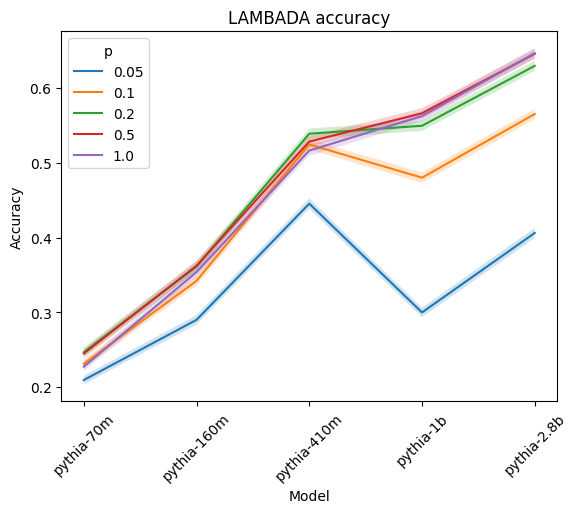

In [58]:
grouped = df1.groupby('p')

fig, ax = plt.subplots()

alpha = 0.2
for proportion, group in grouped:
    ax.plot(group['model'], group['acc'], label=proportion)
    ax.fill_between(group['model'], group['acc'] - group['acc_stderr'], group['acc'] + group['acc_stderr'], alpha=alpha)



ax.tick_params(axis="x", labelrotation=45)
ax.set_xlabel('Model')
ax.set_ylabel('Accuracy')
ax.set_title("LAMBADA accuracy")
ax.legend(title="p")
plt.show()

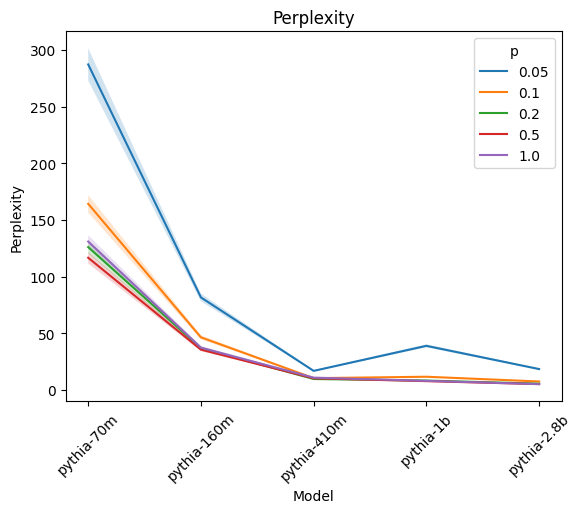

In [59]:
fig, ax = plt.subplots()

alpha = 0.2
for proportion, group in grouped:
    ax.plot(group['model'], group['ppl'], label=proportion)
    ax.fill_between(group['model'], group['ppl'] - group['ppl_stderr'], group['ppl'] + group['ppl_stderr'], alpha=alpha)

ax.tick_params(axis="x", labelrotation=45)
ax.set_xlabel('Model')
ax.set_ylabel('Perplexity')
ax.set_title("Perplexity")
ax.legend(title="p")
plt.show()

### $k_{min} = 2$

In [65]:
df2 = df[(df["k_min"] == 2) | (df["p"] == 1.0)]

In [66]:
df2

,model,p,k_min,ppl,ppl_stderr,acc,acc_stderr,_duration
1,pythia-70m,0.05,2,249.212956,12.440857,0.226664,0.005833,202.234485
4,pythia-70m,0.10,2,154.492596,7.256358,0.239278,0.005944,198.383926
7,pythia-70m,0.20,2,122.738790,5.507989,0.250340,0.006035,200.885112
10,pythia-70m,0.50,2,116.837237,5.047879,0.245100,0.005993,202.850447
13,pythia-160m,0.05,2,72.473062,3.014931,0.303513,0.006406,383.298337
16,pythia-160m,0.10,2,43.702676,1.734537,0.349117,0.006641,382.839944
19,pythia-160m,0.20,2,36.369791,1.404259,0.362507,0.006697,372.879784
22,pythia-160m,0.50,2,35.607706,1.352111,0.363089,0.006700,371.770944
25,pythia-410m,0.05,2,14.512356,0.489877,0.469047,0.006953,849.955076
28,pythia-410m,0.10,2,9.666114,0.298893,0.539103,0.006945,829.588615


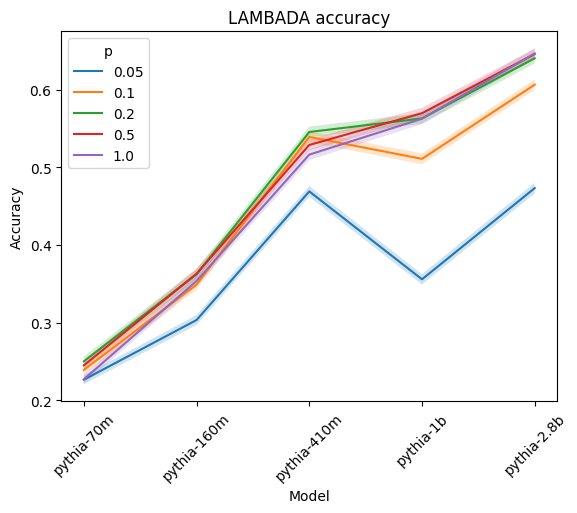

In [68]:
grouped = df2.groupby('p')

fig, ax = plt.subplots()

alpha = 0.2
for proportion, group in grouped:
    ax.plot(group['model'], group['acc'], label=proportion)
    ax.fill_between(group['model'], group['acc'] - group['acc_stderr'], group['acc'] + group['acc_stderr'], alpha=alpha)



ax.tick_params(axis="x", labelrotation=45)
ax.set_xlabel('Model')
ax.set_ylabel('Accuracy')
ax.set_title("LAMBADA accuracy")
ax.legend(title="p")
plt.show()

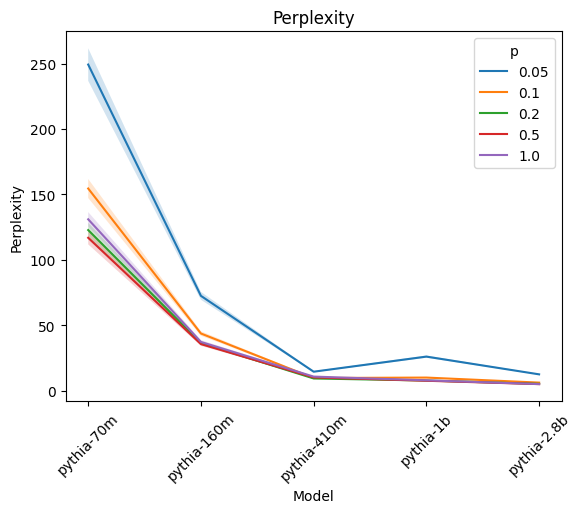

In [69]:
fig, ax = plt.subplots()

alpha = 0.2
for proportion, group in grouped:
    ax.plot(group['model'], group['ppl'], label=proportion)
    ax.fill_between(group['model'], group['ppl'] - group['ppl_stderr'], group['ppl'] + group['ppl_stderr'], alpha=alpha)

ax.tick_params(axis="x", labelrotation=45)
ax.set_xlabel('Model')
ax.set_ylabel('Perplexity')
ax.set_title("Perplexity")
ax.legend(title="p")
plt.show()

### $k_{min} = 4$

In [88]:
df3 = df[(df["k_min"] == 4) | (df["p"] == 1.0)]

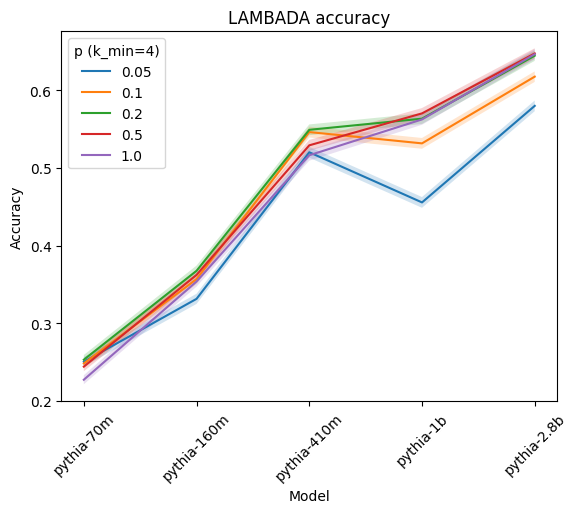

In [90]:
grouped = df3.groupby('p')

fig, ax = plt.subplots()

alpha = 0.2
for proportion, group in grouped:
    ax.plot(group['model'], group['acc'], label=proportion)
    ax.fill_between(group['model'], group['acc'] - group['acc_stderr'], group['acc'] + group['acc_stderr'], alpha=alpha)



ax.tick_params(axis="x", labelrotation=45)
ax.set_xlabel('Model')
ax.set_ylabel('Accuracy')
ax.set_title("LAMBADA accuracy")
ax.legend(title="p (k_min=4)")
plt.show()

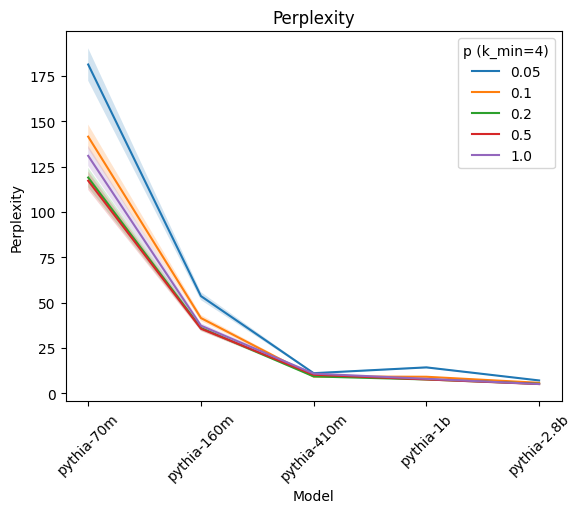

In [92]:
fig, ax = plt.subplots()

alpha = 0.2
for proportion, group in grouped:
    ax.plot(group['model'], group['ppl'], label=proportion)
    ax.fill_between(group['model'], group['ppl'] - group['ppl_stderr'], group['ppl'] + group['ppl_stderr'], alpha=alpha)

ax.tick_params(axis="x", labelrotation=45)
ax.set_xlabel('Model')
ax.set_ylabel('Perplexity')
ax.set_title("Perplexity")
ax.legend(title="p (k_min=4)")
plt.show()